- Pick a dataset and perform some sort of Bayesian analysis on it. Ideas for data: data
you collected or from your lab, from a published paper or from the Internet, preferably
in the broad area of Science and Engineering. The analysis performed must be Bayesian
in some way.

- Make sure to credit the source of data or include a citation of it in your report. If the
data are coming from a published paper, references should be provided or a pointer to
the web source should be given. If the data file is small (≤10mb) and not sensitive,
feel free to include it.

Deliverables

1. A pdf write-up of your project. This should include an introduction, analysis, results
and conclusion. 4-7 page

2. code files related to project. You can use any programming language
to create these

About Dataset
Content
The Dataset is fully dedicated for the developers who want to train the model on Weather Forecasting for Indian climate. This dataset provides data from 1st January 2013 to 24th April 2017 in the city of Delhi, India. The 4 parameters here are
meantemp, humidity, wind_speed, meanpressure.

Acknowledgements
This dataset has been collected from Weather Undergroud API. Dataset ownership and credit goes to them.


## Load the data 

In [414]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [415]:
data=pd.read_csv('./DailyDelhiClimateTrain.csv')

In [416]:
data

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000
...,...,...,...,...,...
1457,2016-12-28,17.217391,68.043478,3.547826,1015.565217
1458,2016-12-29,15.238095,87.857143,6.000000,1016.904762
1459,2016-12-30,14.095238,89.666667,6.266667,1017.904762
1460,2016-12-31,15.052632,87.000000,7.325000,1016.100000


In [417]:
data.columns

Index(['date', 'meantemp', 'humidity', 'wind_speed', 'meanpressure'], dtype='object')

In [418]:
print('Date Range  {} : {}'.format(data['date'].min(),data['date'].max()))

Date Range  2013-01-01 : 2017-01-01


## Exploratory Data Analysis: basic descriptive statistics, data clean, data processing, data visualization

### basic descrptive statistics 

In [419]:
data.describe()

,meantemp,humidity,wind_speed,meanpressure
count,1462.000000,1462.000000,1462.000000,1462.000000
mean,25.495521,60.771702,6.802209,1011.104548
std,7.348103,16.769652,4.561602,180.231668
min,6.000000,13.428571,0.000000,-3.041667
25%,18.857143,50.375000,3.475000,1001.580357
50%,27.714286,62.625000,6.221667,1008.563492
75%,31.305804,72.218750,9.238235,1014.944901
max,38.714286,100.000000,42.220000,7679.333333


In [420]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1462 entries, 0 to 1461
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          1462 non-null   object 
 1   meantemp      1462 non-null   float64
 2   humidity      1462 non-null   float64
 3   wind_speed    1462 non-null   float64
 4   meanpressure  1462 non-null   float64
dtypes: float64(4), object(1)
memory usage: 57.2+ KB


In [421]:
corr=data.corr()

In [422]:
corr.style.background_gradient(cmap='coolwarm')

,meantemp,humidity,wind_speed,meanpressure
meantemp,1.000000,-0.571951,0.306468,-0.038818
humidity,-0.571951,1.000000,-0.373972,0.001734
wind_speed,0.306468,-0.373972,1.000000,-0.020670
meanpressure,-0.038818,0.001734,-0.020670,1.000000


<AxesSubplot:>

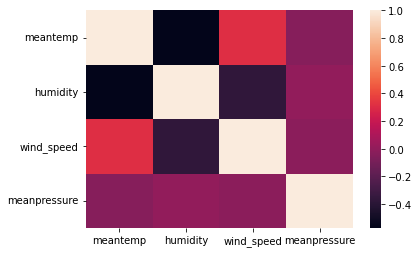

In [423]:
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

### data clean: check missing, null, NaN, empty and extreme values, outliers using boxplot

In [424]:
np.sum(data.isnull().values.any()) ## no null values 

0

In [425]:
np.sum(data.isna().values.any())

0

### boxplot: check outliers 

/usr/local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='meantemp'>

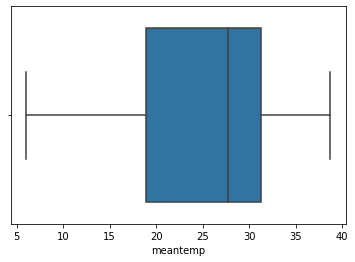

In [426]:
sns.boxplot(data['meantemp'])

/usr/local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='humidity'>

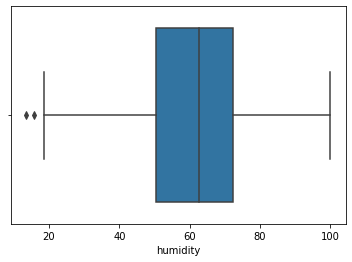

In [427]:
sns.boxplot(data['humidity'])

/usr/local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='wind_speed'>

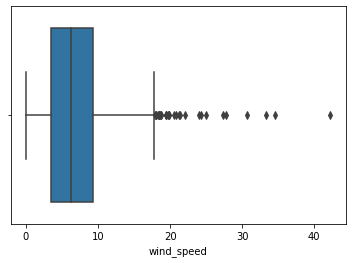

In [428]:
sns.boxplot(data['wind_speed'])

/usr/local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='meanpressure'>

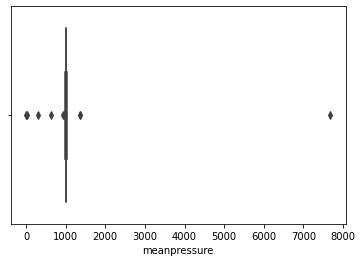

In [429]:
sns.boxplot(data['meanpressure'])

### data preprocessing: converting date variable to datetime 
### ## extract day, month, year from the date column 

In [430]:

data['date']=pd.to_datetime(data['date'])

In [431]:
data['year']=data['date'].dt.year
data['month']=data['date'].dt.month
data['MonthName']=data['date'].dt.month_name()
data['DayName']=data['date'].dt.day_name()

In [432]:
data.head()

,date,meantemp,humidity,wind_speed,meanpressure,year,month,MonthName,DayName
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667,2013,1,January,Tuesday
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000,2013,1,January,Wednesday
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667,2013,1,January,Thursday
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667,2013,1,January,Friday
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000,2013,1,January,Saturday


### data visualization

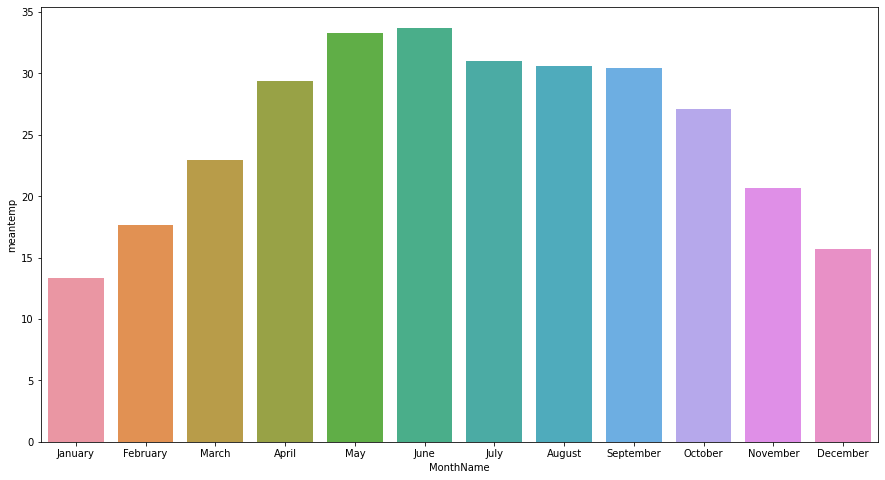

In [433]:
### Delhi's Mean Temperature By Month

gb=data.groupby(['month','MonthName'])['meantemp'].mean().reset_index()
plt.figure(figsize=(15,8))
sns.barplot(x='MonthName',y='meantemp',data=gb);

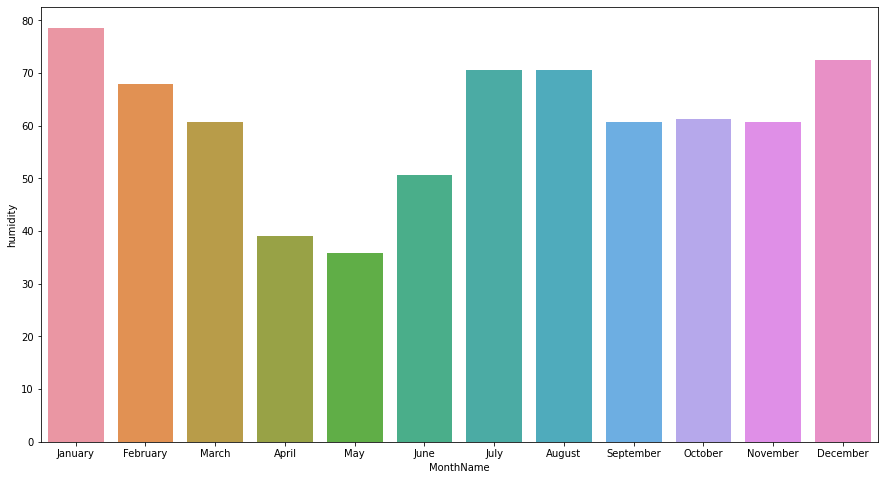

In [434]:
### Delhi's humidity By Month

gb=data.groupby(['month','MonthName'])['humidity'].mean().reset_index()
plt.figure(figsize=(15,8))
sns.barplot(x='MonthName',y='humidity',data=gb);

In [337]:
fig = px.line(data, x=data['date'], y='meantemp', title='Mean temperature in Delhi with slider')
fig.update_xaxes(rangeslider_visible=True)
fig.show()

In [338]:
fig = px.line(data, x=data['date'], y='humidity', title='Humidity in Delhi with slider')
fig.update_xaxes(rangeslider_visible=True)
fig.show()

In [339]:
fig = px.line(data, x=data['date'], y='wind_speed', title='Wind Speed in Delhi with slider')
fig.update_xaxes(rangeslider_visible=True)
fig.show()

In [340]:
fig = px.line(data, x=data['date'], y='meanpressure', title='Mean pressure in Delhi with slider')
fig.update_xaxes(rangeslider_visible=True)
fig.show()

### check data point 

In [341]:
data=data.drop(['date','year','month','MonthName','DayName'],axis=1)

In [369]:
df=data.copy()

In [370]:
df.head()

,meantemp,humidity,wind_speed,meanpressure
0,10.000000,84.500000,0.000000,1015.666667
1,7.400000,92.000000,2.980000,1017.800000
2,7.166667,87.000000,4.633333,1018.666667
3,8.666667,71.333333,1.233333,1017.166667
4,6.000000,86.833333,3.700000,1016.500000


In [371]:
df['meantemp'].median()

27.714285714285715

In [372]:
target=np.where(df['meantemp']>df['meantemp'].median(),1,0)

In [376]:
df['ExtremeHot']=target

,meantemp,humidity,wind_speed,meanpressure,ExtremeHot
0,10.000000,84.500000,0.000000,1015.666667,0
1,7.400000,92.000000,2.980000,1017.800000,0
2,7.166667,87.000000,4.633333,1018.666667,0
3,8.666667,71.333333,1.233333,1017.166667,0
4,6.000000,86.833333,3.700000,1016.500000,0
...,...,...,...,...,...
1457,17.217391,68.043478,3.547826,1015.565217,0
1458,15.238095,87.857143,6.000000,1016.904762,0
1459,14.095238,89.666667,6.266667,1017.904762,0
1460,15.052632,87.000000,7.325000,1016.100000,0


In [377]:
df=df.drop(['meantemp'],axis=1)
df.head()

,humidity,wind_speed,meanpressure,ExtremeHot
0,84.500000,0.000000,1015.666667,0
1,92.000000,2.980000,1017.800000,0
2,87.000000,4.633333,1018.666667,0
3,71.333333,1.233333,1017.166667,0
4,86.833333,3.700000,1016.500000,0


In [378]:
inputs=df.iloc[:,:-1]

In [379]:
from sklearn.preprocessing import StandardScaler

In [380]:
scaler=StandardScaler()

In [381]:
scaled_inputs=scaler.fit_transform(inputs)

In [382]:
from sklearn.model_selection import train_test_split

In [383]:
x_train,x_test,y_train,y_test=train_test_split(scaled_inputs,target,test_size=0.2,random_state=20)

## Naive Bayes model with sklearn

In [458]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [459]:
bnb=BernoulliNB()

In [460]:
mod=bnb.fit(x_train,y_train)

In [461]:
mod.coef_

/usr/local/lib/python3.9/site-packages/sklearn/utils/deprecation.py:103: FutureWarning:

Attribute `coef_` was deprecated in version 0.24 and will be removed in 1.1 (renaming of 0.26).



array([[-0.92316361, -0.60157999, -3.88499433]])

In [462]:
mod.feature_log_prob_

array([[-0.35256021, -1.19664263, -0.19840953],
       [-0.92316361, -0.60157999, -3.88499433]])

In [463]:
y_pred=bnb.predict(x_test)

In [464]:
from sklearn.metrics import accuracy_score

In [465]:
accuracy_score(y_pred,y_test)

0.9010238907849829

## Logistic Regression model 

In [442]:
from sklearn.linear_model import LogisticRegression

In [443]:
reg=LogisticRegression()

In [444]:
mod2=reg.fit(x_train,y_train)

In [445]:
y_pred2=reg.predict(x_test)

In [447]:
accuracy_score(y_pred2,y_test)

0.7610921501706485